## Import Necessary Libraries

In [1]:
import pandas as pd
import mysql.connector as mysql
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pickle

import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

## User Defined Functions

In [2]:
def cont_data(data,col):
    print("Statistics Analysis of Column:",col,'\n')
    mini = data[col].min()
    maxi = data[col].max()  
    mean = round(data[col].mean(),2)
    median = round(data[col].median(),2)
    mode = round(3*median - 2*mean,2)
    skew = round(data[col].skew(),2)
    kur = round(data[col].kurt(),2)
    skewn=''
    if mean == median:
        print("Mean == Median == Mode \nData is Symmentric Data\n")
        skewn = 'No Skewness'
        if kur < 3:
            print("Kurtosis value",kur,"\nData having platykurtic or Negative or flat kurtosis") 
        elif kur == 3:
            print("Kurtosis value",kur,"\nData having Mesokurtic or Equal or No Kurtosis")
        else:
            print("Kurtosis value",kur,"\nData having Leptokurtic or Positive or thin kurtosis")
    else:
        print("Mean != Median != Mode \nData is Asymmentric Data")
        if mean < median:
            skewn = 'Left Skewness'
        else:
            skewn = 'Right Skewness'
    dic = {'max':[maxi],'min':[mini],'mean':[mean],'median':[median],'mode':[mode],'skewness_value':[skew],'kurtosis_value':[kur],'skewness_type':[skewn]}
    con_d=pd.DataFrame(dic,index=[col])
    return con_d

## Connecting to Database - used_car

In [3]:
conn = mysql.connect(host='localhost', database='used_car', user='root', password='root')

## From Database data table bring values to DataFrame

In [4]:
df = pd.read_sql("SELECT * FROM used_car.cleaned_data",conn)
df.head(2)

C:\Users\divesh\AppData\Local\Temp\ipykernel_5912\3968829675.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM used_car.cleaned_data",conn)


Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  \
0   Mumbai  2010              72000       CNG       Manual      First      5   
1     Pune  2015              41000    Diesel       Manual      First      5   

   Price Manufacture                     Model  Mileage_car Mileage_Units  \
0   1.75      Maruti           Wagon R LXI CNG        26.60         km/kg   
1  12.50     Hyundai  Creta 1.6 CRDi SX Option        19.67          kmpl   

   Engine_CC  Power_bhp  
0        998      58.16  
1       1582     126.20

## Type of Dataset

In [5]:
type(df)

pandas.core.frame.DataFrame

## Shape of the Dataset

In [6]:
print("Number of Dimensions: ",df.ndim)
shape = df.shape
print("\nTotal Number of Rows: ",shape[0])
print("Total Number of Columns: ",shape[1])

Number of Dimensions:  2

Total Number of Rows:  7253
Total Number of Columns:  14


## Displaying Column Names

In [7]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Manufacture', 'Model', 'Mileage_car',
       'Mileage_Units', 'Engine_CC', 'Power_bhp'],
      dtype='object')

## Displaying DataType of each Column

In [8]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                  int64
Price                float64
Manufacture           object
Model                 object
Mileage_car          float64
Mileage_Units         object
Engine_CC              int64
Power_bhp            float64
dtype: object

## Distribution of the Data

### Column Name: Location => Categorical Data

Total Number of Categories:  11


Category Names:  ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


Categories Count: 

 Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64


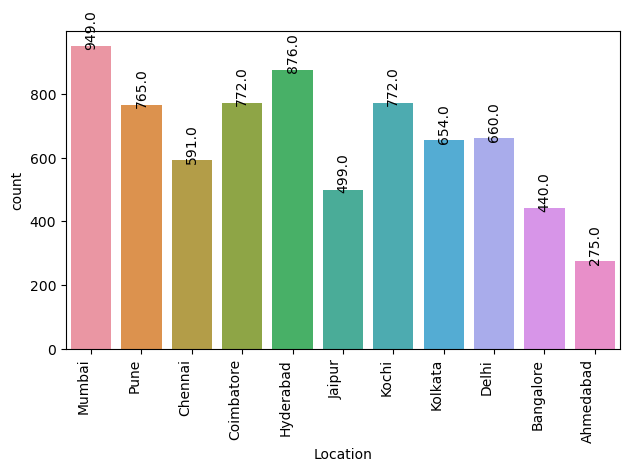

In [9]:
print("Total Number of Categories: ",df['Location'].nunique())

print("\n\nCategory Names: ",df['Location'].unique())

print("\n\nCategories Count: \n\n",df['Location'].value_counts())

ax = sns.countplot(data=df, x='Location')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Adding the bin counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation=90)

plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

# Assuming df is your DataFrame and 'Location' is the column you want to plot
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Count']

# Create a pie chart
fig = go.Figure(go.Pie(
    labels=location_counts['Location'],
    values=location_counts['Count'],
    hole=0.3,
    hoverinfo="label+percent",
    textinfo="percent",
    textfont_size=15,
    pull=[0.1] * len(location_counts),  # Pulling out the slices for 3D effect
    marker=dict(
        line=dict(color='white', width=2)
    )
))

# Update layout for 3D effect
fig.update_layout(
    title_text="Distribution of Locations",
    annotations=[dict(text='Locations', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

### Column Name: Year => Categorical Data

Total Number of Categories:  23


Category Names:  [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998 1996]


Categories Count: 

 2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64


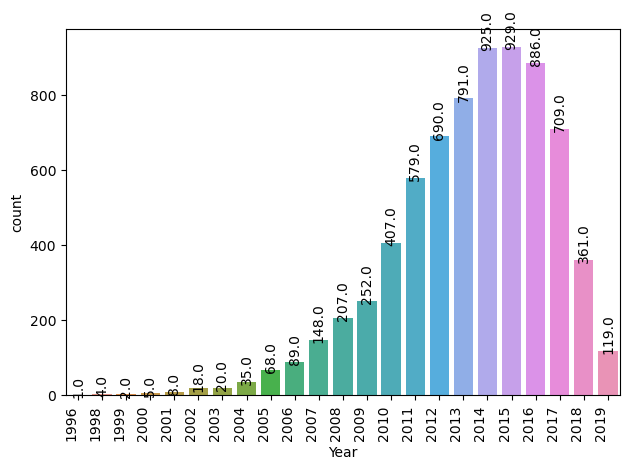

In [10]:
print("Total Number of Categories: ",df['Year'].nunique())

print("\n\nCategory Names: ",df['Year'].unique())

print("\n\nCategories Count: \n\n",df['Year'].value_counts())

ax = sns.countplot(data=df, x='Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Adding the bin counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation=90)

plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

# Assuming df is your DataFrame and 'Location' is the column you want to plot
location_counts = df['Year'].value_counts().reset_index()
location_counts.columns = ['Year', 'Count']

# Create a pie chart
fig = go.Figure(go.Pie(
    labels=location_counts['Year'],
    values=location_counts['Count'],
    hole=0.3,
    hoverinfo="label+percent",
    textinfo="percent",
    textfont_size=15,
    pull=[0.1] * len(location_counts),  # Pulling out the slices for 3D effect
    marker=dict(
        line=dict(color='white', width=2)
    )
))

# Update layout for 3D effect
fig.update_layout(
    title_text="Distribution of Year",
    annotations=[dict(text='Year', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

### Column Name: Kilometers_Driven => Continuous Data

Statistics Analysis of Column: Kilometers_Driven 

Mean != Median != Mode 
Data is Asymmentric Data


max  min      mean   median      mode  skewness_value  \
Kilometers_Driven  6500000  171  58699.06  53416.0  42849.88           61.58   

                   kurtosis_value   skewness_type  
Kilometers_Driven         4674.73  Right Skewness

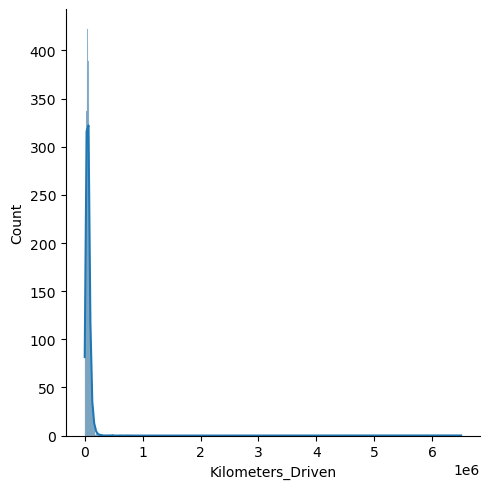

In [11]:
Kilometers_Driven = cont_data(df,'Kilometers_Driven')
display(Kilometers_Driven)
sns.displot(data=df, x='Kilometers_Driven', kde= True)
plt.show()

### Column Name: Fuel_Type => Categorical Data

Total Number of Categories:  5


Category Names:  ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


Categories Count: 

 Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64


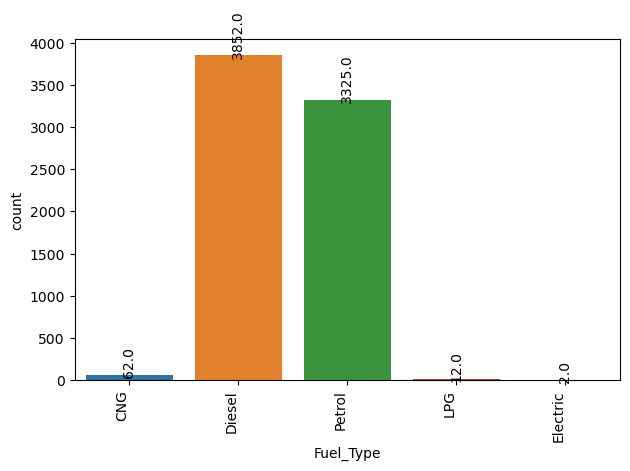

In [12]:
print("Total Number of Categories: ",df['Fuel_Type'].nunique())

print("\n\nCategory Names: ",df['Fuel_Type'].unique())

print("\n\nCategories Count: \n\n",df['Fuel_Type'].value_counts())

ax = sns.countplot(data=df, x='Fuel_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Adding the bin counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation=90)

plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

# Assuming df is your DataFrame and 'Location' is the column you want to plot
location_counts = df['Fuel_Type'].value_counts().reset_index()
location_counts.columns = ['Fuel_Type', 'Count']

# Create a pie chart
fig = go.Figure(go.Pie(
    labels=location_counts['Fuel_Type'],
    values=location_counts['Count'],
    hole=0.3,
    hoverinfo="label+percent",
    textinfo="percent",
    textfont_size=15,
    pull=[0.1] * len(location_counts),  # Pulling out the slices for 3D effect
    marker=dict(
        line=dict(color='white', width=2)
    )
))

# Update layout for 3D effect
fig.update_layout(
    title_text="Distribution of Fuel_Type",
    annotations=[dict(text='Fuel_Type', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

### Column Name: Transmission => Categorical Data

Total Number of Categories:  2


Category Names:  ['Manual' 'Automatic']


Categories Count: 

 Manual       5204
Automatic    2049
Name: Transmission, dtype: int64


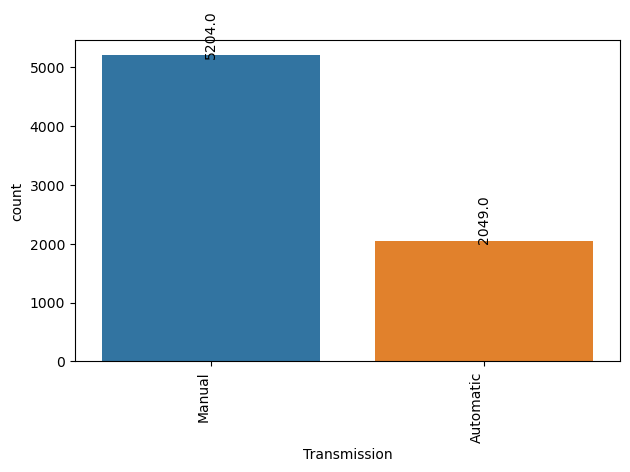

In [13]:
print("Total Number of Categories: ",df['Transmission'].nunique())

print("\n\nCategory Names: ",df['Transmission'].unique())

print("\n\nCategories Count: \n\n",df['Transmission'].value_counts())

ax = sns.countplot(data=df, x='Transmission')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Adding the bin counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation=90)

plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

# Assuming df is your DataFrame and 'Location' is the column you want to plot
location_counts = df['Transmission'].value_counts().reset_index()
location_counts.columns = ['Transmission', 'Count']

# Create a pie chart
fig = go.Figure(go.Pie(
    labels=location_counts['Transmission'],
    values=location_counts['Count'],
    hole=0.3,
    hoverinfo="label+percent",
    textinfo="percent",
    textfont_size=15,
    pull=[0.1] * len(location_counts),  # Pulling out the slices for 3D effect
    marker=dict(
        line=dict(color='white', width=2)
    )
))

# Update layout for 3D effect
fig.update_layout(
    title_text="Distribution of Transmission",
    annotations=[dict(text='Transmission', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

### Column Name: Owner_Type => Categorical Data

Total Number of Categories:  4


Category Names:  ['First' 'Second' 'Fourth & Above' 'Third']


Categories Count: 

 First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64


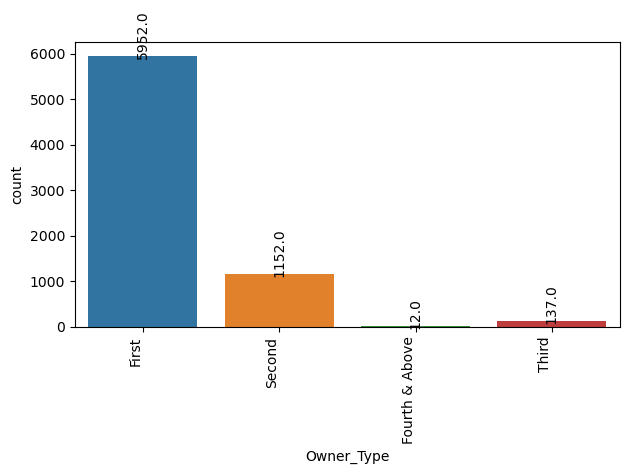

In [14]:
print("Total Number of Categories: ",df['Owner_Type'].nunique())

print("\n\nCategory Names: ",df['Owner_Type'].unique())

print("\n\nCategories Count: \n\n",df['Owner_Type'].value_counts())

ax = sns.countplot(data=df, x='Owner_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Adding the bin counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation=90)

plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

# Assuming df is your DataFrame and 'Location' is the column you want to plot
location_counts = df['Owner_Type'].value_counts().reset_index()
location_counts.columns = ['Owner_Type', 'Count']

# Create a pie chart
fig = go.Figure(go.Pie(
    labels=location_counts['Owner_Type'],
    values=location_counts['Count'],
    hole=0.3,
    hoverinfo="label+percent",
    textinfo="percent",
    textfont_size=15,
    pull=[0.1] * len(location_counts),  # Pulling out the slices for 3D effect
    marker=dict(
        line=dict(color='white', width=2)
    )
))

# Update layout for 3D effect
fig.update_layout(
    title_text="Distribution of Owner_Type",
    annotations=[dict(text='Owner_Type', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

### Column Name: Seats => Categorical Data

Total Number of Categories:  8


Category Names:  [ 5  7  8  4  6  2 10  9]


Categories Count: 

 5     6096
7      801
8      170
4      119
6       38
2       18
10       8
9        3
Name: Seats, dtype: int64


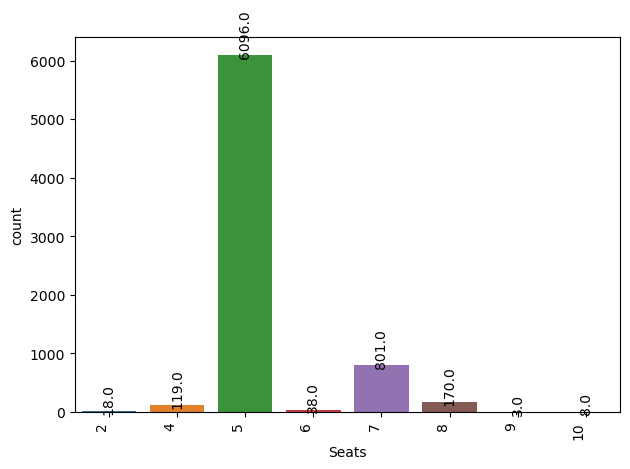

In [15]:
print("Total Number of Categories: ",df['Seats'].nunique())

print("\n\nCategory Names: ",df['Seats'].unique())

print("\n\nCategories Count: \n\n",df['Seats'].value_counts())

ax = sns.countplot(data=df, x='Seats')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Adding the bin counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation=90)

plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

# Assuming df is your DataFrame and 'Location' is the column you want to plot
location_counts = df['Seats'].value_counts().reset_index()
location_counts.columns = ['Seats', 'Count']

# Create a pie chart
fig = go.Figure(go.Pie(
    labels=location_counts['Seats'],
    values=location_counts['Count'],
    hole=0.3,
    hoverinfo="label+percent",
    textinfo="percent",
    textfont_size=15,
    pull=[0.1] * len(location_counts),  # Pulling out the slices for 3D effect
    marker=dict(
        line=dict(color='white', width=2)
    )
))

# Update layout for 3D effect
fig.update_layout(
    title_text="Distribution of Seats",
    annotations=[dict(text='Seats', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

### Column Name: Price => Continuous Data

Statistics Analysis of Column: Price 

Mean != Median != Mode 
Data is Asymmentric Data


max   min  mean  median  mode  skewness_value  kurtosis_value  \
Price  160.0  0.44  9.48    5.64 -2.04            3.34           17.09   

        skewness_type  
Price  Right Skewness

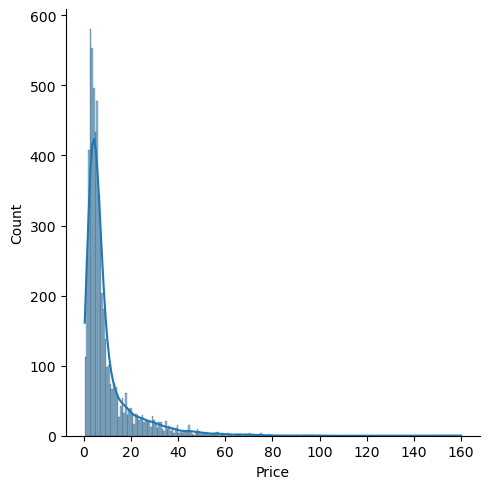

In [16]:
Kilometers_Driven = cont_data(df,'Price')
display(Kilometers_Driven)
sns.displot(data=df, x='Price', kde= True)
plt.show()

### Column Name: Manufacture => Categorical Data

Total Number of Categories:  33


Category Names:  ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


Categories Count: 

 Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley       

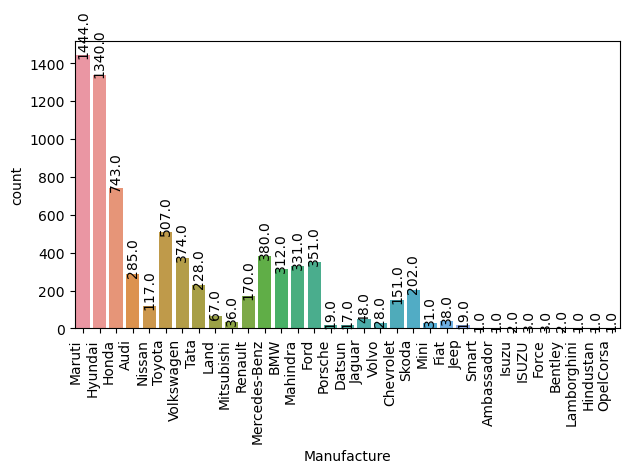

In [17]:
print("Total Number of Categories: ",df['Manufacture'].nunique())

print("\n\nCategory Names: ",df['Manufacture'].unique())

print("\n\nCategories Count: \n\n",df['Manufacture'].value_counts())

ax = sns.countplot(data=df, x='Manufacture')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Adding the bin counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation=90)

plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

# Assuming df is your DataFrame and 'Location' is the column you want to plot
location_counts = df['Manufacture'].value_counts().reset_index()
location_counts.columns = ['Manufacture', 'Count']

# Create a pie chart
fig = go.Figure(go.Pie(
    labels=location_counts['Manufacture'],
    values=location_counts['Count'],
    hole=0.3,
    hoverinfo="label+percent",
    textinfo="percent",
    textfont_size=15,
    pull=[0.1] * len(location_counts),  # Pulling out the slices for 3D effect
    marker=dict(
        line=dict(color='white', width=2)
    )
))

# Update layout for 3D effect
fig.update_layout(
    title_text="Distribution of Manufacture",
    annotations=[dict(text='Manufacture', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

### Column Name: Model => Categorical Data

In [18]:
print("Total Number of Categories: ",df['Model'].nunique())

print("\n\nCategory Names: ",df['Model'].unique())

print("\n\nCategories Count: \n\n",df['Model'].value_counts())


Total Number of Categories:  2041


Category Names:  ['Wagon R LXI CNG' 'Creta 1.6 CRDi SX Option' 'Jazz V' ...
 'EcoSport 1.5 Petrol Ambiente' 'Compass 1.4 Sport' 'Elite i20 Magna Plus']


Categories Count: 

 XUV500 W8 2WD                     55
Swift VDI                         49
Swift Dzire VDI                   42
City 1.5 S MT                     39
Swift VDI BSIV                    37
                                  ..
Beat LT Option                     1
Rapid 1.6 MPI AT Elegance Plus     1
EcoSport 1.5 TDCi Ambiente         1
i10 Magna 1.1 iTech SE             1
Elite i20 Magna Plus               1
Name: Model, Length: 2041, dtype: int64


### Column Name: Mileage_car => Continuous Data

Statistics Analysis of Column: Mileage_car 

Mean != Median != Mode 
Data is Asymmentric Data


max  min   mean  median   mode  skewness_value  kurtosis_value  \
Mileage_car  400.0  6.4  18.39    18.2  17.82           32.58         1978.71   

              skewness_type  
Mileage_car  Right Skewness

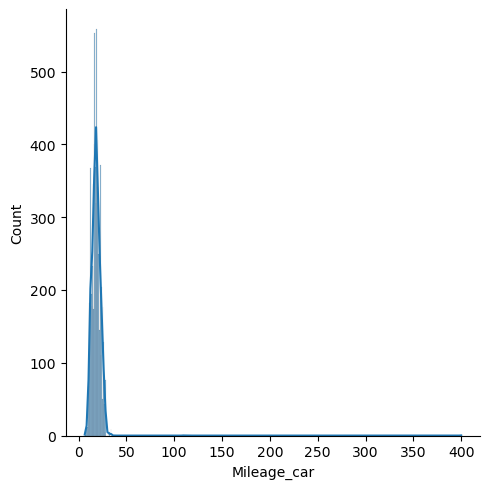

In [19]:
Kilometers_Driven = cont_data(df,'Mileage_car')
display(Kilometers_Driven)
sns.displot(data=df, x='Mileage_car', kde= True)
plt.show()

### Column Name: Mileage_Units => Categorical Data

Total Number of Categories:  3


Category Names:  ['km/kg' 'kmpl' 'Km/Chrg']


Categories Count: 

 kmpl       7177
km/kg        74
Km/Chrg       2
Name: Mileage_Units, dtype: int64


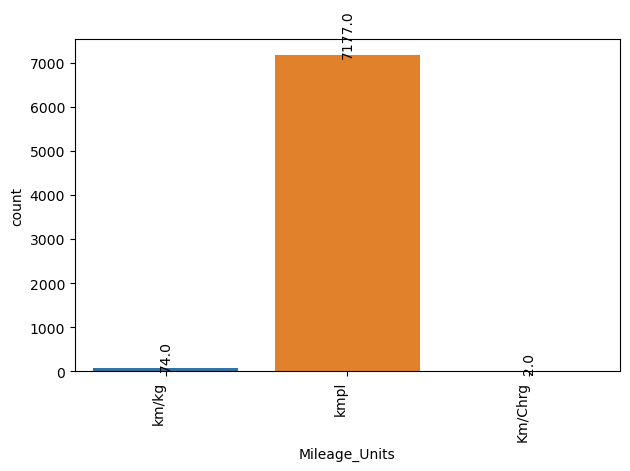

In [20]:
print("Total Number of Categories: ",df['Mileage_Units'].nunique())

print("\n\nCategory Names: ",df['Mileage_Units'].unique())

print("\n\nCategories Count: \n\n",df['Mileage_Units'].value_counts())

ax = sns.countplot(data=df, x='Mileage_Units')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Adding the bin counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation=90)

plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

# Assuming df is your DataFrame and 'Location' is the column you want to plot
location_counts = df['Mileage_Units'].value_counts().reset_index()
location_counts.columns = ['Mileage_Units', 'Count']

# Create a pie chart
fig = go.Figure(go.Pie(
    labels=location_counts['Mileage_Units'],
    values=location_counts['Count'],
    hole=0.3,
    hoverinfo="label+percent",
    textinfo="percent",
    textfont_size=15,
    pull=[0.1] * len(location_counts),  # Pulling out the slices for 3D effect
    marker=dict(
        line=dict(color='white', width=2)
    )
))

# Update layout for 3D effect
fig.update_layout(
    title_text="Distribution of Mileage_Units",
    annotations=[dict(text='Mileage_Units', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

### Column Name: Engine_CC => Continuous Data

Statistics Analysis of Column: Engine_CC 

Mean != Median != Mode 
Data is Asymmentric Data


max  min     mean  median     mode  skewness_value  \
Engine_CC  5998   72  1615.76  1493.0  1247.48            1.42   

           kurtosis_value   skewness_type  
Engine_CC            3.18  Right Skewness

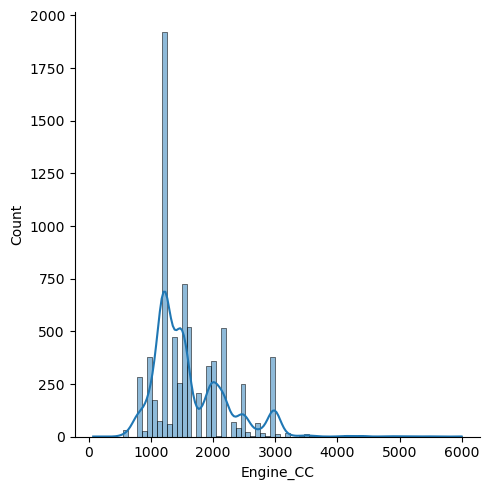

In [21]:
Kilometers_Driven = cont_data(df,'Engine_CC')
display(Kilometers_Driven)
sns.displot(data=df, x='Engine_CC', kde= True)
plt.show()

### Column Name: Power_bhp => Continuous Data

Statistics Analysis of Column: Power_bhp 

Mean != Median != Mode 
Data is Asymmentric Data


max   min    mean  median   mode  skewness_value  kurtosis_value  \
Power_bhp  616.0  34.2  112.48    93.7  56.14            1.98            7.14   

            skewness_type  
Power_bhp  Right Skewness

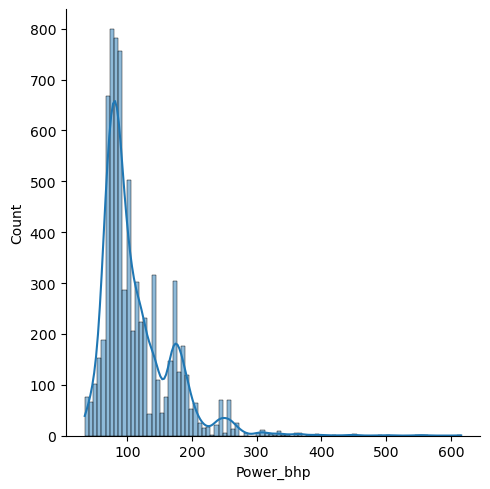

In [22]:
Kilometers_Driven = cont_data(df,'Power_bhp')
display(Kilometers_Driven)
sns.displot(data=df, x='Power_bhp', kde= True)
plt.show()

In [23]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                  int64
Price                float64
Manufacture           object
Model                 object
Mileage_car          float64
Mileage_Units         object
Engine_CC              int64
Power_bhp            float64
dtype: object

In [24]:
def correlation(data):
    print("Correlation between the columns\n")
    sns.heatmap(data.corr(),annot=True)
    plt.show()
    print("\nRelation between columns\n")
    sns.pairplot(data=data)
    plt.figure(figsize=(38,38))
    plt.show()

Correlation between the columns



C:\Users\divesh\AppData\Local\Temp\ipykernel_5912\2051210285.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



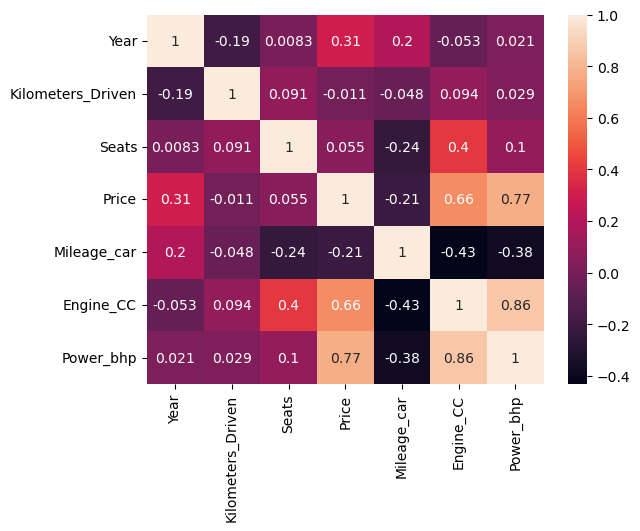


Relation between columns



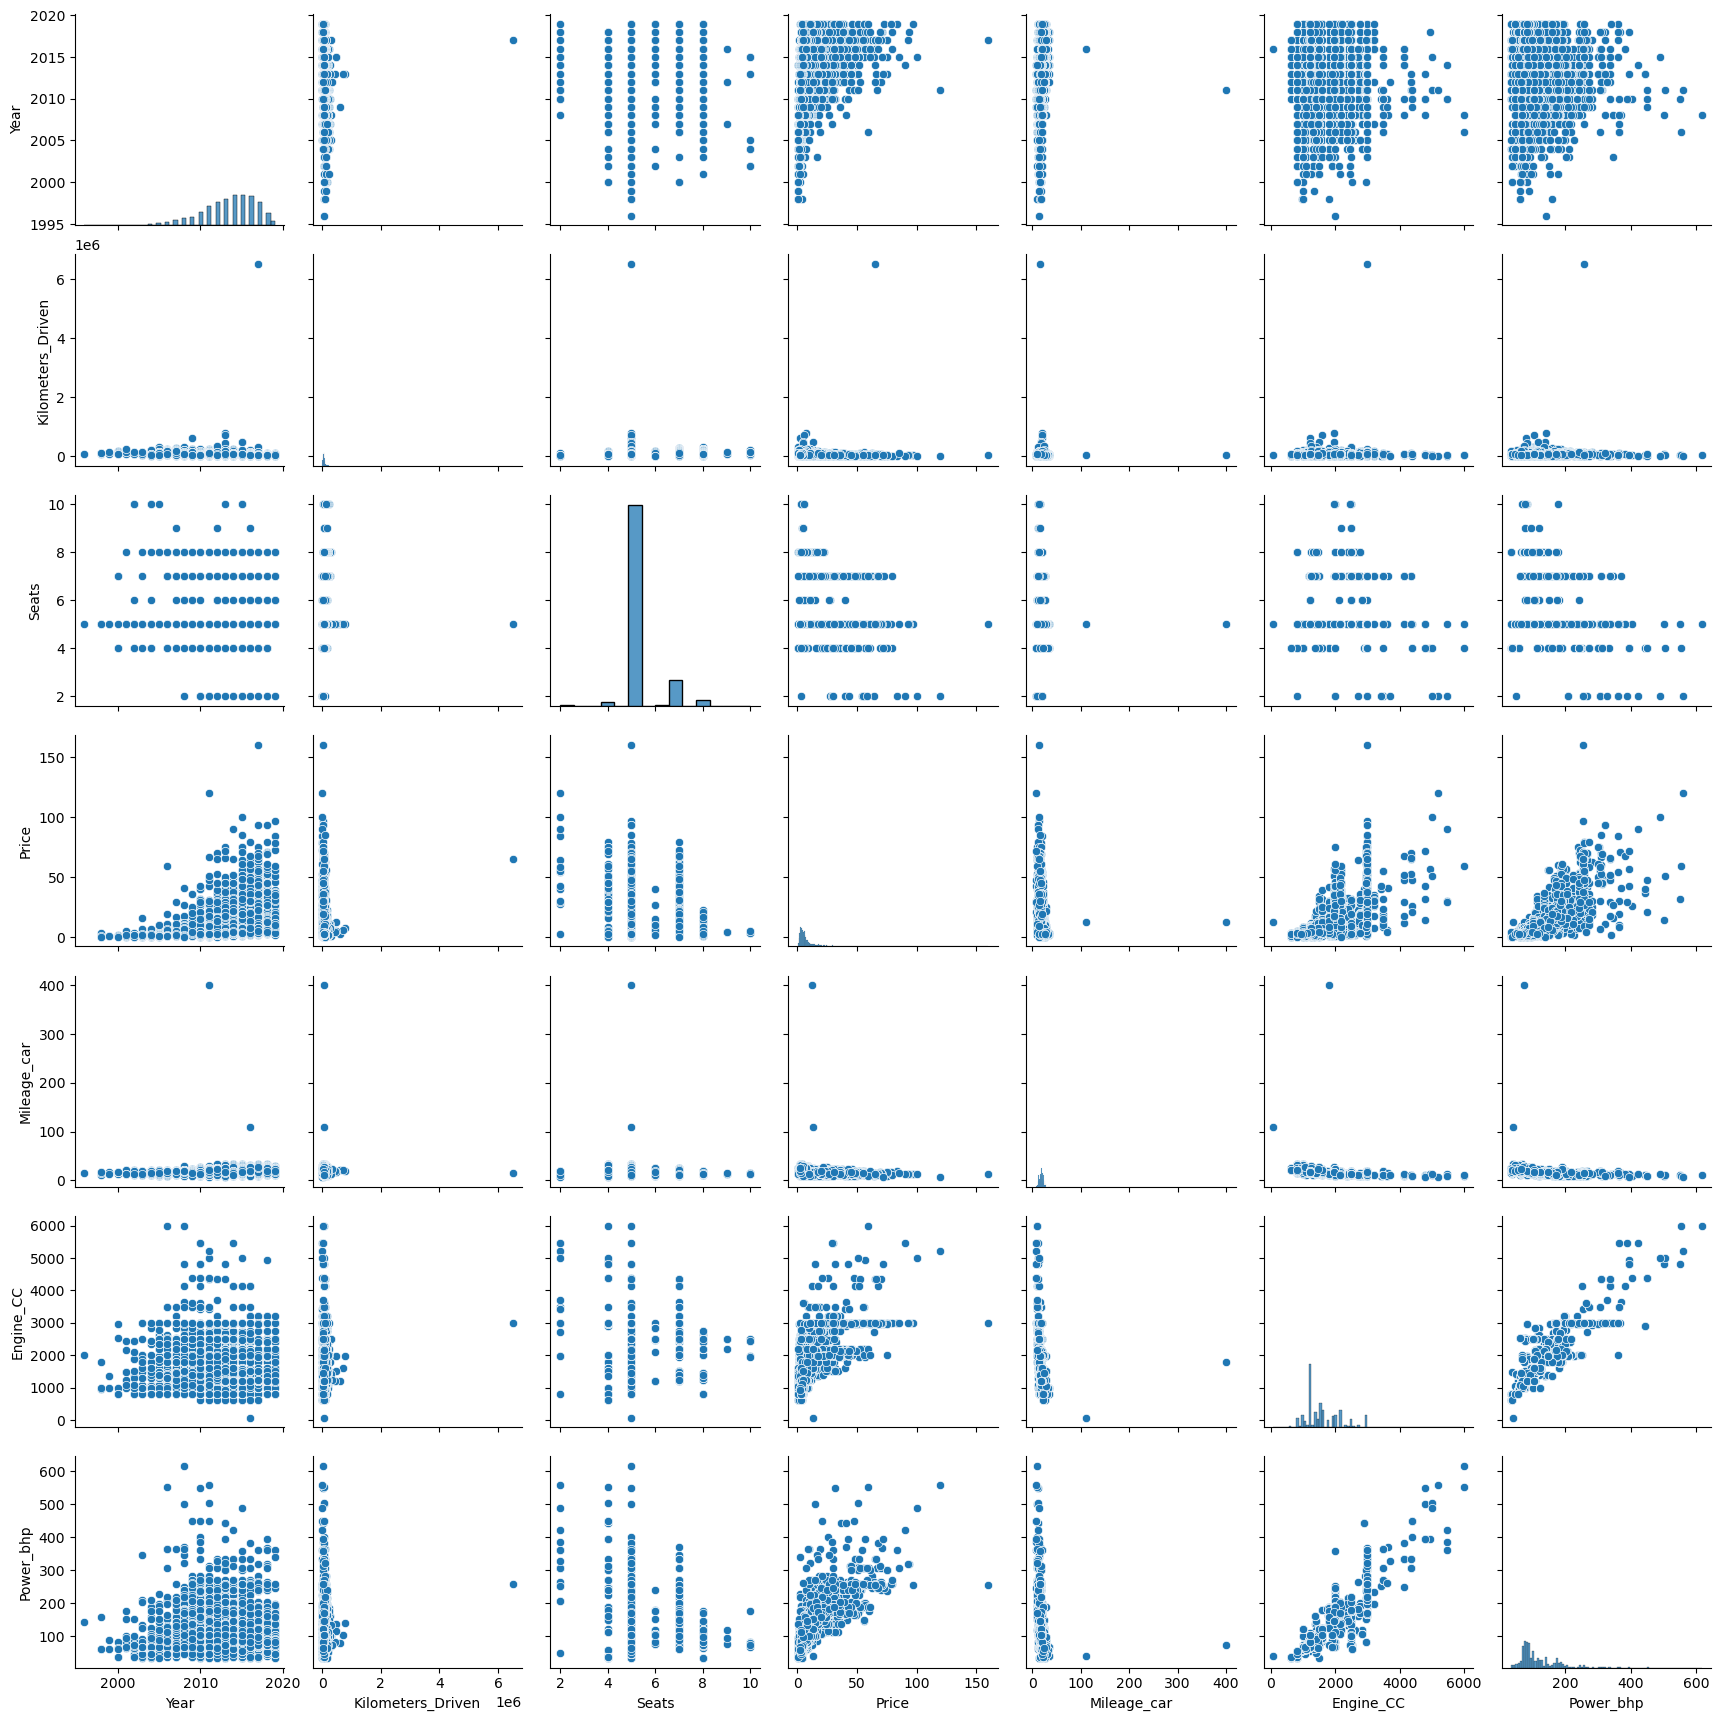

<Figure size 3800x3800 with 0 Axes>

In [25]:
correlation(df)

In [26]:
# Location
onehot_encoder_Location = OneHotEncoder(sparse=False)
# Fit and transform the 'Location' column
location_encoded = onehot_encoder_Location.fit_transform(df[['Location']])
# Create a DataFrame with the encoded values
encoded_df = pd.DataFrame(location_encoded, columns=onehot_encoder_Location.get_feature_names_out(['Location']))
# Combine with the original DataFrame if needed
df = df.join(encoded_df)
with open('../model/onehot_encoder_Location.pkl', 'wb') as file:
    pickle.dump((onehot_encoder_Location, df), file)

C:\Users\divesh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [27]:
# Fuel_Type
onehot_encoder_Fuel_Type = OneHotEncoder(sparse=False)
# Fit and transform the 'Location' column
Fuel_Type_encoded = onehot_encoder_Fuel_Type.fit_transform(df[['Fuel_Type']])
# Create a DataFrame with the encoded values
encoded_df = pd.DataFrame(Fuel_Type_encoded, columns=onehot_encoder_Fuel_Type.get_feature_names_out(['Fuel_Type']))
# Combine with the original DataFrame if needed
df = df.join(encoded_df)
with open('../model/onehot_encoder_Fuel_Type.pkl', 'wb') as file:
    pickle.dump((onehot_encoder_Fuel_Type, df), file)

C:\Users\divesh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [28]:
# Transmission
onehot_encoder_Transmission = OneHotEncoder(sparse=False)
# Fit and transform the 'Location' column
Transmission_encoded = onehot_encoder_Transmission.fit_transform(df[['Transmission']])
# Create a DataFrame with the encoded values
encoded_df = pd.DataFrame(Transmission_encoded, columns=onehot_encoder_Transmission.get_feature_names_out(['Transmission']))
# Combine with the original DataFrame if needed
df = df.join(encoded_df)
with open('../model/onehot_encoder_Transmission.pkl', 'wb') as file:
    pickle.dump((onehot_encoder_Transmission, df), file)
    


# Owner_Type
onehot_encoder_Owner_Type = OneHotEncoder(sparse=False)
# Fit and transform the 'Location' column
Owner_Type_encoded = onehot_encoder_Owner_Type.fit_transform(df[['Owner_Type']])
# Create a DataFrame with the encoded values
encoded_df = pd.DataFrame(Owner_Type_encoded, columns=onehot_encoder_Owner_Type.get_feature_names_out(['Owner_Type']))
# Combine with the original DataFrame if needed
df = df.join(encoded_df)
with open('../model/onehot_encoder_Owner_Type.pkl', 'wb') as file:
    pickle.dump((onehot_encoder_Owner_Type, df), file)
    

# Manufacture
onehot_encoder_Manufacture = OneHotEncoder(sparse=False)
# Fit and transform the 'Location' column
Manufacture_encoded = onehot_encoder_Manufacture.fit_transform(df[['Manufacture']])
# Create a DataFrame with the encoded values
encoded_df = pd.DataFrame(Manufacture_encoded, columns=onehot_encoder_Manufacture.get_feature_names_out(['Manufacture']))
# Combine with the original DataFrame if needed
df = df.join(encoded_df)
with open('../model/onehot_encoder_Manufacture.pkl', 'wb') as file:
    pickle.dump((onehot_encoder_Manufacture, df), file)
    

# Mileage_Units
onehot_encoder_Mileage_Units = OneHotEncoder(sparse=False)
# Fit and transform the 'Location' column
Mileage_Units_encoded = onehot_encoder_Mileage_Units.fit_transform(df[['Mileage_Units']])
# Create a DataFrame with the encoded values
encoded_df = pd.DataFrame(Mileage_Units_encoded, columns=onehot_encoder_Mileage_Units.get_feature_names_out(['Mileage_Units']))
# Combine with the original DataFrame if needed
df = df.join(encoded_df)
with open('../model/onehot_encoder_Mileage_Units.pkl', 'wb') as file:
    pickle.dump((onehot_encoder_Mileage_Units, df), file)

C:\Users\divesh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\divesh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\divesh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\divesh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you le

In [29]:
df.drop(['Location','Fuel_Type','Transmission','Owner_Type','Manufacture','Model','Mileage_Units','Model'], inplace=True, axis=1)

In [30]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Mileage_car',
       'Engine_CC', 'Power_bhp', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Manufacture_Ambassador', 'Manufacture_Audi',
       'Manufacture_BMW', 'Manufacture_Bentley', 'Manufacture_Chevrolet',
       'Manufacture_Datsun', 'Manufacture_Fiat', 'Manufacture_Force',
       'Manufacture_Ford', 'Manufacture_Hindustan', 'Manufacture_Honda',
       'Manufacture_Hyundai', 'Manufacture_ISUZU', 'Manufacture_Isuzu',
       'Manufacture_Jaguar', 'Manufacture_Jeep', 'Manufactu

In [31]:
X_valid = df[df['Price'].isnull()]

In [32]:
X_val = X_valid.drop(['Price'],axis=1)

In [33]:
df_price = df.dropna()

In [34]:
X = df_price.drop(['Price'],axis=1)
y = df_price['Price']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4815, 64)

(1204, 64)

(4815,)

(1204,)

In [36]:
y_train= pd.DataFrame(y_train)
y_test= pd.DataFrame(y_test)

In [37]:
X_train.to_csv('../data/X_train.csv',index = False)
X_test.to_csv('../data/X_test.csv',index = False)
X_val.to_csv('../data/X_val.csv',index = False)
y_train.to_csv('../data/y_train.csv',index = False)
y_test.to_csv('../data/y_test.csv',index = False)

## Saving train, test, val files in mysql